In [1]:
# Import libraries and dependencies
import numpy as np
import pandas as pd
from pathlib import Path

%matplotlib inline

In [12]:
csvpath = Path('../Resources/carspaces_data.csv')
df = pd.read_csv(csvpath, parse_dates=True, index_col='Timestamp')
df = df.drop(columns='Unnamed: 0')
df.head(5)

,Available
Timestamp,
2022-03-11 00:00:46,148
2022-03-11 00:10:47,148
2022-03-11 00:20:49,148
2022-03-11 00:30:51,148
2022-03-11 00:40:52,148


<AxesSubplot:xlabel='Timestamp'>

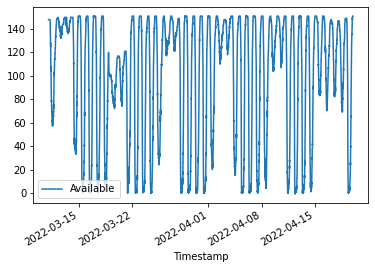

In [13]:

df.plot()

<AxesSubplot:xlabel='Timestamp'>

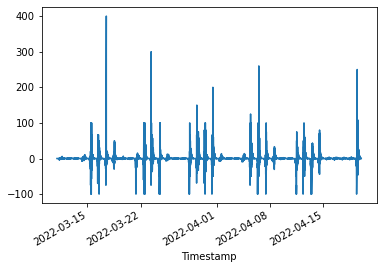

In [15]:
df['Change'] = df.Available.pct_change() * 100 
df = df.resample('5min').mean()
df = df.dropna()
df = df[~df.isin([np.nan, np.inf, -np.inf]).any(1)]
df.Change.plot()

In [16]:
# Create the GARCH model
from arch import arch_model
model = arch_model(df.Change, mean="Zero", vol="GARCH", p=2, q=2)
results = model.fit(disp="off")
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                       Zero Mean - GARCH Model Results                        
==============================================================================
Dep. Variable:                 Change   R-squared:                       0.000
Mean Model:                 Zero Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:               -17298.4
Distribution:                  Normal   AIC:                           34606.8
Method:            Maximum Likelihood   BIC:                           34641.6
                                        No. Observations:                 7738
Date:                Wed, Apr 20 2022   Df Residuals:                     7738
Time:                        22:54:55   Df Model:                            0
                            Volatility Model                            
========================================================================
                 coef    std err          t      P>|t|  95.0% Conf. Int.
------------------------------------------------------------------------
omega          0.3720  1.482e-02     25.104 4.534e-139 [  0.343,  0.401]
alpha[1]       0.3310  4.277e-02      7.740  9.972e-15 [  0.247,  0.415]
alpha[2]       0.2943  3.201e-02      9.193  3.824e-20 [  0.232,  0.357]
beta[1]        0.0332      0.113      0.294      0.769 [ -0.188,  0.254]
beta[2]        0.3295  8.847e-02      3.725  1.955e-04 [  0.156,  0.503]
========================================================================

Covariance estimator: robust
"""

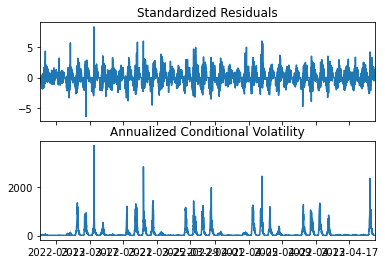

In [17]:
# Plot the model estimate of the annualized volatility
fig = results.plot(annualize='D')

In [27]:
# Create a 5 day forecast of EUR to CAD exchange rate volatility
forecast_horizon = 15
# Take the last day of the data we used above. 
# If forecast horizon is 3, then the resulting 'h.1', 'h.2', and 'h.3' 
# are the forecasts for the following 3 days.
forecasts = results.forecast(start=df.index.max(), horizon=forecast_horizon)

# Annualize the forecast
intermediate = np.sqrt(forecasts.variance.dropna() * 365 )
intermediate.head()

,h.01,h.02,h.03,h.04,h.05,h.06,h.07,h.08,h.09,h.10,h.11,h.12,h.13,h.14,h.15
Timestamp,,,,,,,,,,,,,,,
2022-04-19 23:50:00,14.723962,16.93487,19.377567,21.247615,23.11849,24.740427,26.308563,27.743843,29.118985,30.41039,31.647612,32.825195,33.956483,35.041708,36.087713


<AxesSubplot:title={'center':'15 Minute Forecast of Volatility'}>

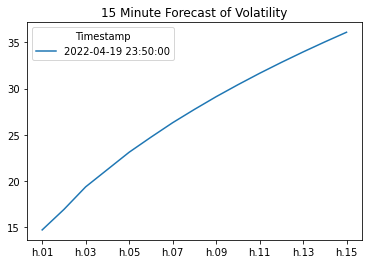

In [29]:
# Transpose the forecast so that it is easier to plot
final = intermediate.dropna().T

# Plot the final forecast
final.plot(title="15 Minute Forecast of Volatility")